In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_classification
from sklearn.metrics import silhouette_samples, silhouette_score
from numpy import unique
from numpy import where
import plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

# Customer segmentation using various Clustering Algorithms and Techniques

Clustering in machine learning is a type of unsupervised learning that involves grouping similar data points together based on certain features or characteristics. The goal is to identify inherent patterns, structures, or relationships within the data without any predefined labels.

In the context of clustering, the algorithm aims to partition the dataset into distinct groups or clusters, where data points within the same cluster are more similar to each other compared to those in other clusters.

This project covers clustering algorithms used for customer segmentation such as k-Means centroid based clustering, Gaussian Mixture Model(GMM) distribution clustering, Spectral Clustering and Agglomerative Hierarchical Clustering.

Data collection & analysis

In [2]:
customer_data=pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#number of rows and columns in the dataframe
customer_data.shape

(200, 5)

In [5]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
customer_data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
#information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#checking missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Visualizing distribution and identifying outliers using boxplot

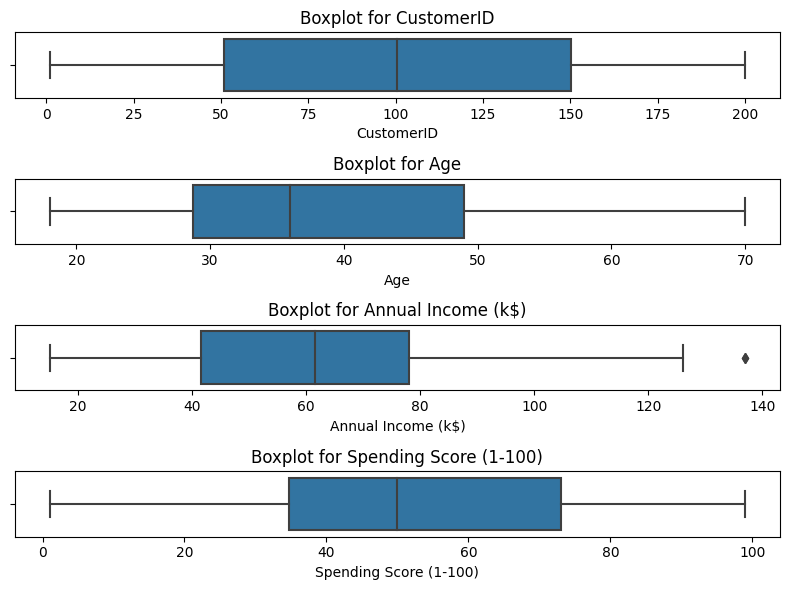

In [9]:
num_columns = customer_data.select_dtypes(include=['number']).columns
num_plots = len(num_columns)

fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 6))

for i, column in enumerate(num_columns):

    sns.boxplot(x=customer_data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

Data visualization

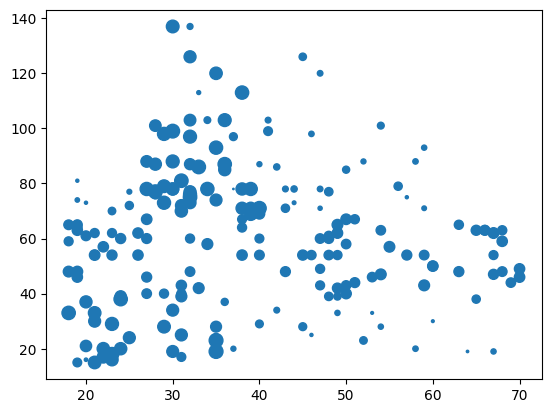

In [10]:
plt.scatter(customer_data["Age"],customer_data["Annual Income (k$)"],customer_data["Spending Score (1-100)"])

PairPlotting

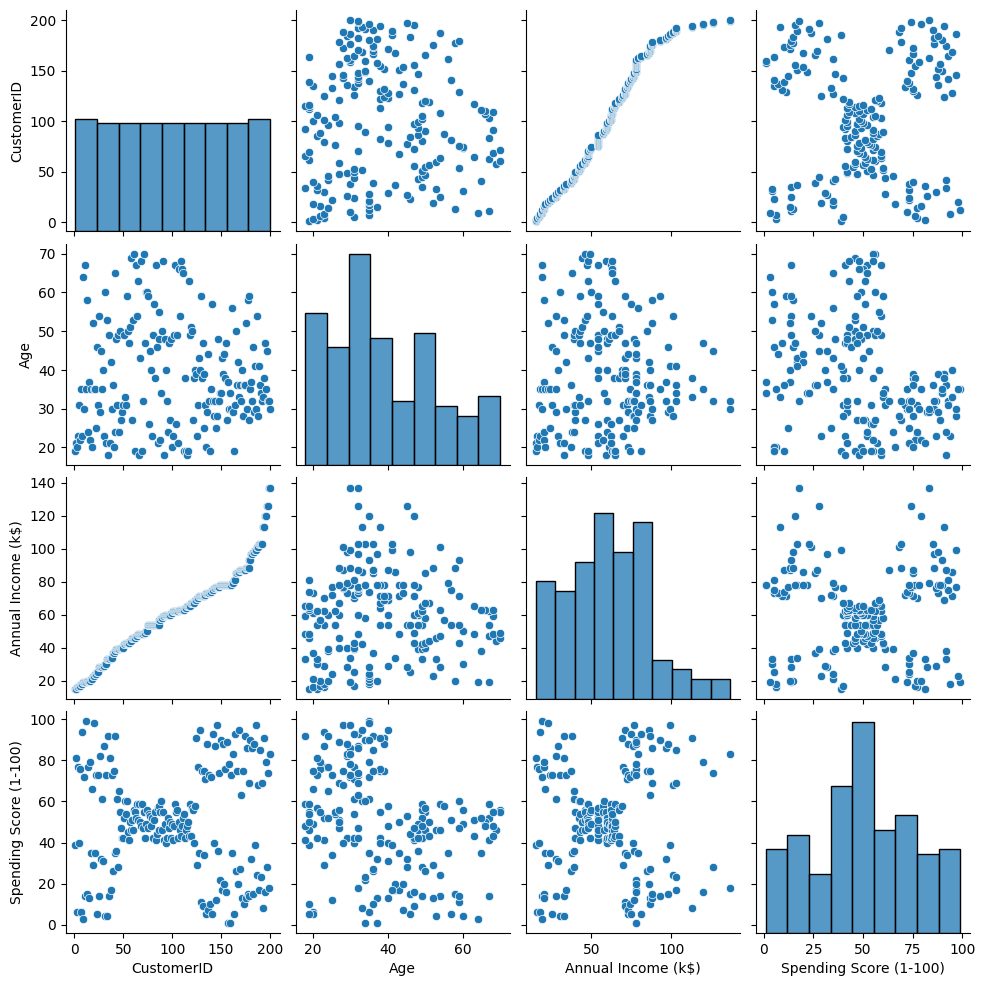

In [11]:
sns.pairplot(customer_data)

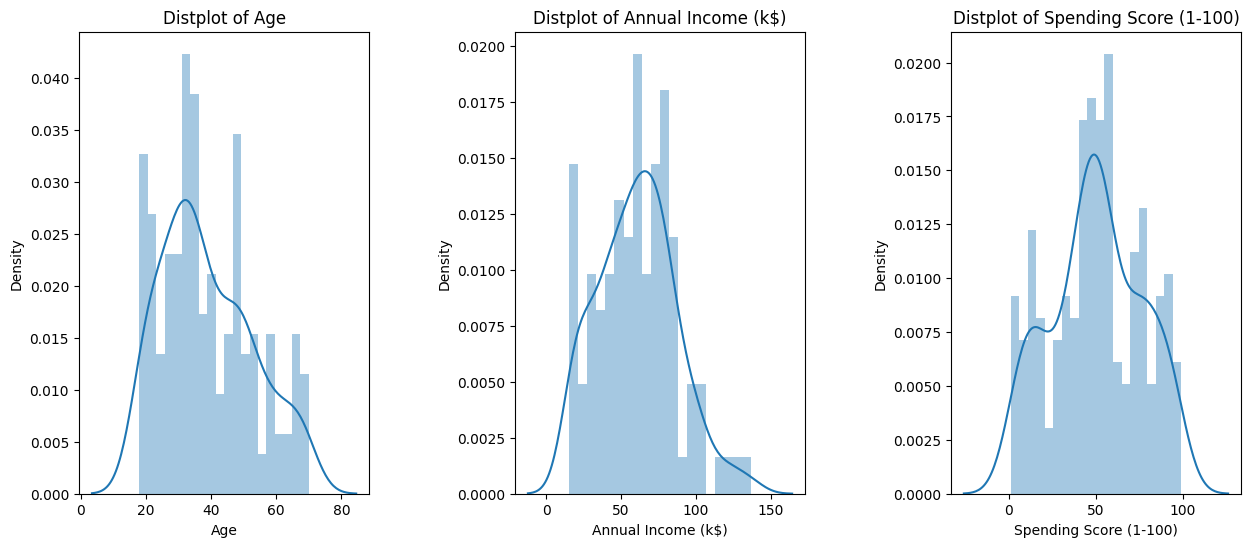

In [12]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(customer_data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

Count by Gender

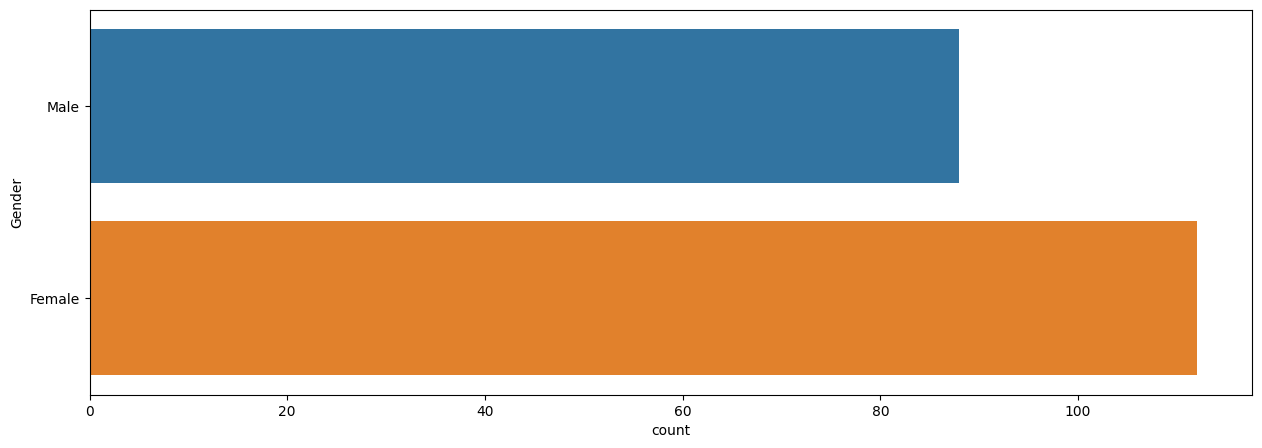

In [13]:
plt.figure(1,figsize=(15,5))
sns.countplot(y='Gender',data=customer_data)
plt.show()

Plotting relationships between Age, Annual Income and Spending Score

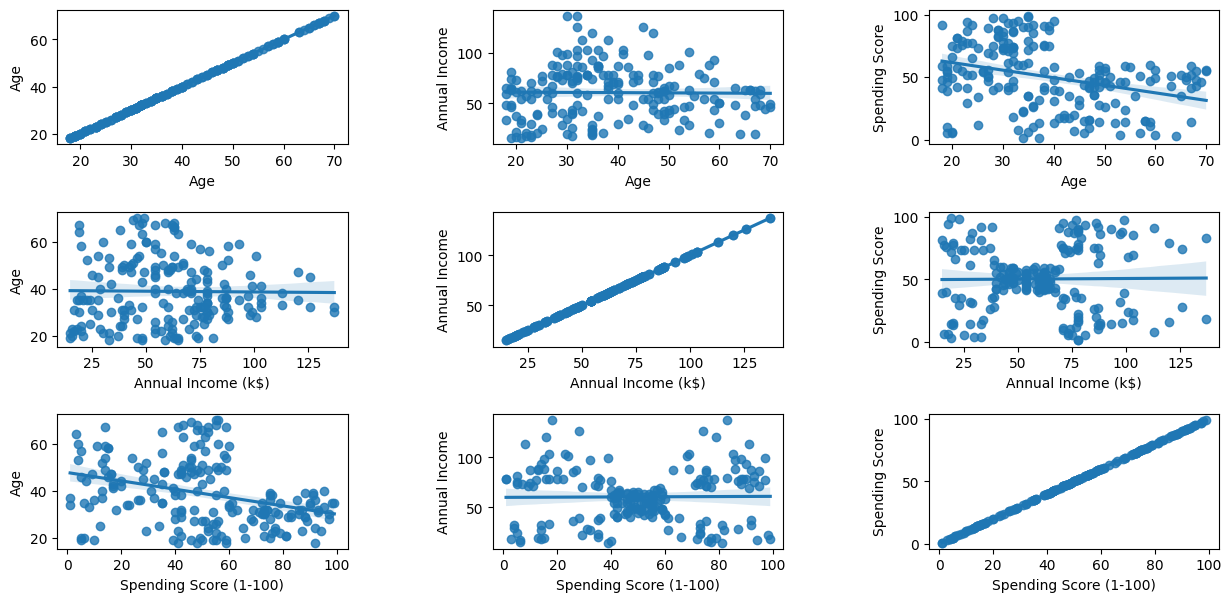

In [14]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = customer_data)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

Annual Income by Gender and Age

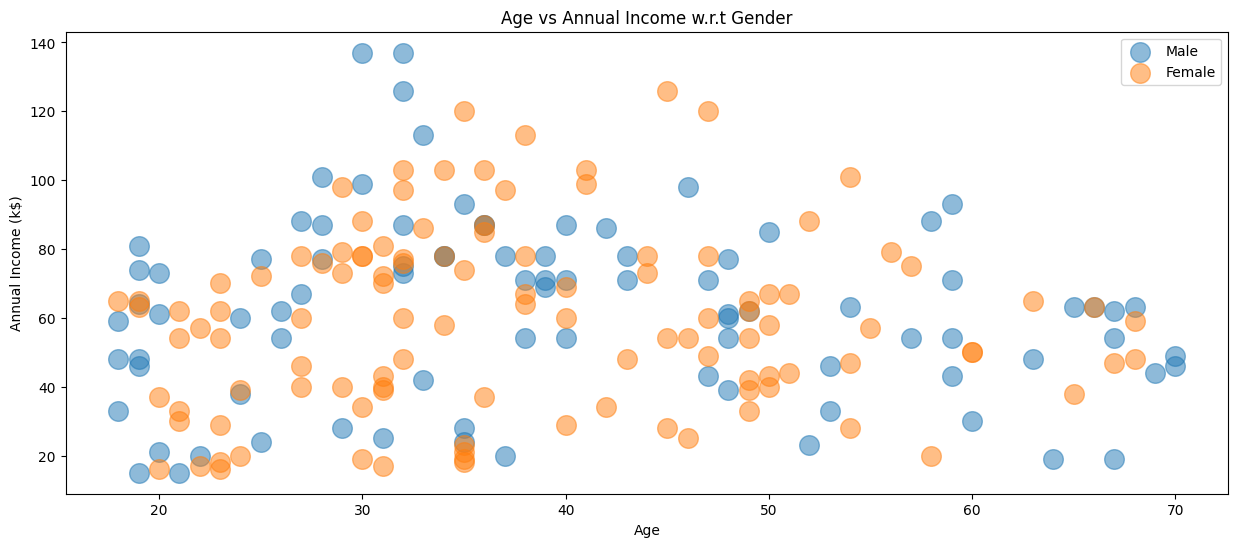

In [15]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = customer_data[customer_data['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

Spending Score by Annual Income and Gender

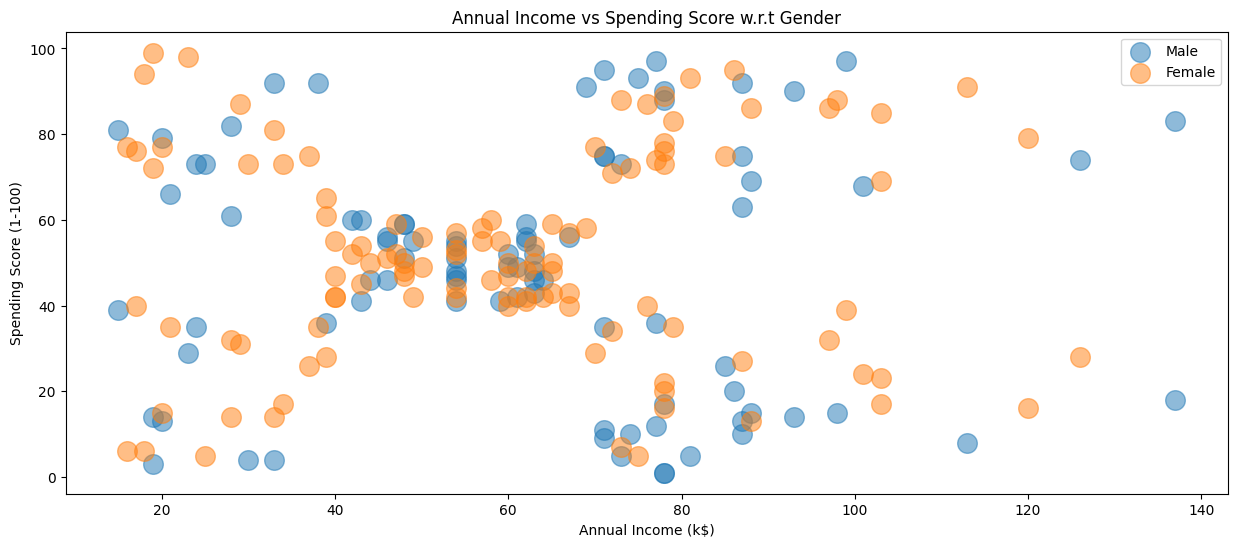

In [16]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = customer_data[customer_data['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

Clustering with the annual income & spending score columns

In [17]:
X=customer_data.iloc[:,[3,4]].values

Choosing optimum number of clusters
WCSS Sum of Squares

In [18]:
#finding wcss value for different number of clusters

wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

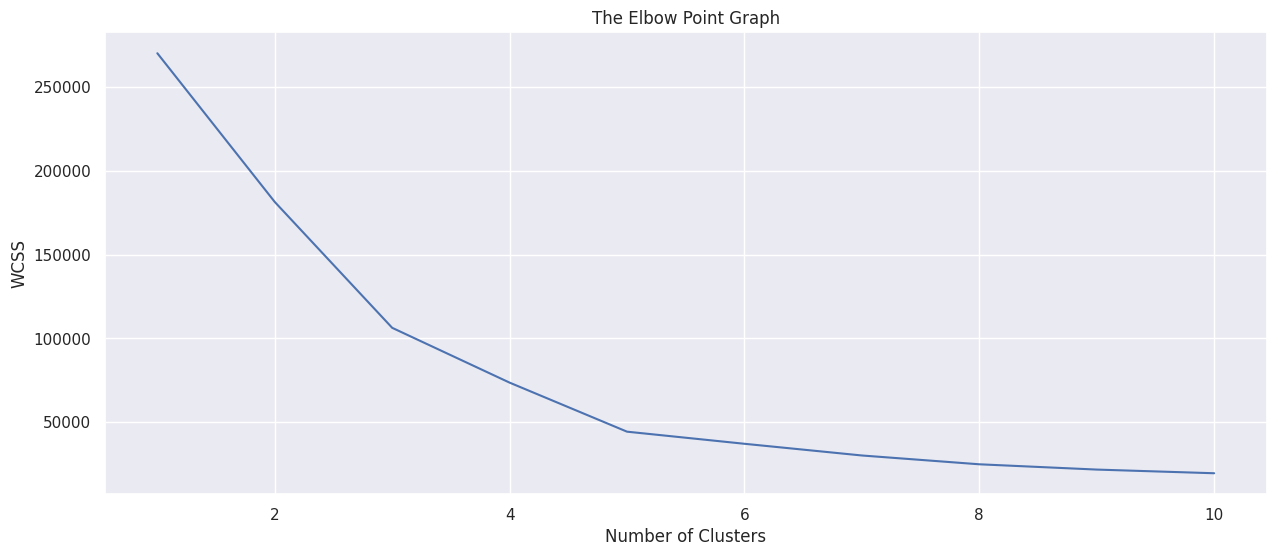

In [19]:
#plotting elbow graph
sns.set()
plt.figure(1 , figsize = (15 ,6))
plt.plot(range(1,11),wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

Optimum number of clusters = 5

Training the K-Means clustering Model

In [20]:
kmeans=KMeans(n_clusters=5, init="k-means++",random_state=0)
#return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Visualizing the clusters

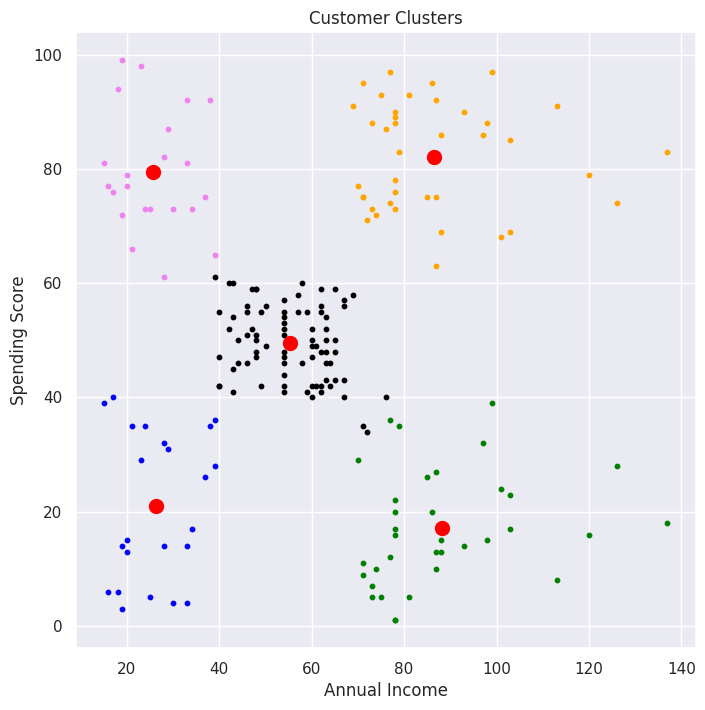

In [21]:
#plotting clusters and centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=10,c="green",label="Cluster 1")
plt.scatter(X[Y==1,0],X[Y==1,1],s=10,c="black",label="Cluster 2")
plt.scatter(X[Y==2,0],X[Y==2,1],s=10,c="orange",label="Cluster 3")
plt.scatter(X[Y==3,0],X[Y==3,1],s=10,c="violet",label="Cluster 4")
plt.scatter(X[Y==4,0],X[Y==4,1],s=10,c="blue",label="Cluster 5")

#plotting centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c="red", label="Centroids")

plt.title("Customer Clusters")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

Clustering by Age and Spending Score

In [22]:
X1 = customer_data[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

Selecting Optimum number of Clusters based on Inertia ( Squared Distance between Centroids and data points)

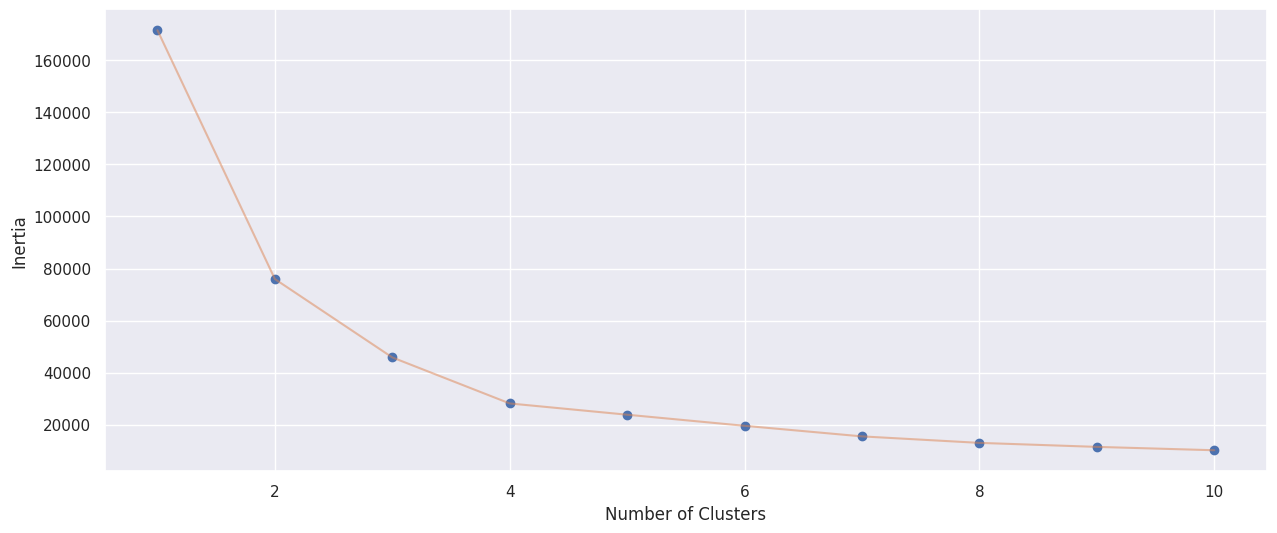

In [23]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Plotting Scatter graph of Clusters

In [24]:
kmeans1=KMeans(n_clusters=3, init="k-means++",random_state=0)
#return a label for each data point based on their cluster
Y1 = kmeans1.fit_predict(X1)
print(Y1)

[1 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 1 0 2 0 2 0 1 1 2 0 2 0 2 0 2 0 2
 0 2 0 1 0 1 1 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 1 0 2 0 1 0
 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 1
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


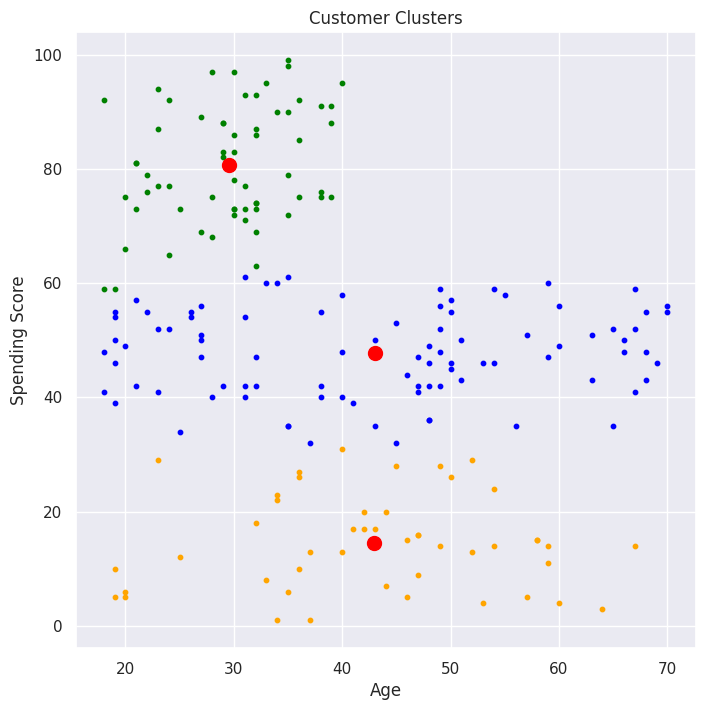

In [25]:
#plotting clusters and centroids

plt.figure(figsize=(8,8))
plt.scatter(X1[Y1==0,0],X1[Y1==0,1],s=10,c="green",label="Cluster 1")
plt.scatter(X1[Y1==1,0],X1[Y1==1,1],s=10,c="blue",label="Cluster 2")
plt.scatter(X1[Y1==2,0],X1[Y1==2,1],s=10,c="orange",label="Cluster 3")

#plotting centroids
plt.scatter(kmeans1.cluster_centers_[:,0],kmeans1.cluster_centers_[:,1], s=100, c="red", label="Centroids")

plt.title("Customer Clusters")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

Clustering using Age, Annual Income and Spending Score

In [26]:
X3 = customer_data[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

Elbow Graph

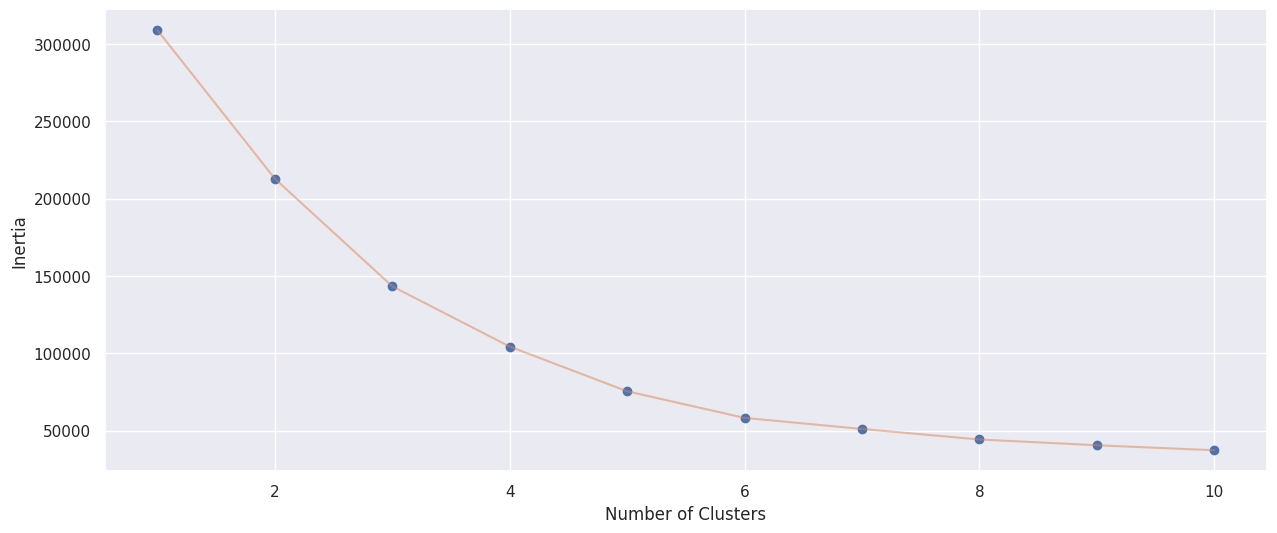

In [27]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Training the Model

In [28]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

Plotting the clusters

In [29]:
customer_data['label3'] =  labels3
trace1 = go.Scatter3d(
    x= customer_data['Age'],
    y= customer_data['Spending Score (1-100)'],
    z= customer_data['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = customer_data['label3'], 
        size= 20,
        line=dict(
            color= customer_data['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

# Gaussian Mixture Model Clustering (GMM)

The Gaussian Mixture Model (GMM) is a probabilistic model used for clustering and density estimation. It assumes that the data is generated from a mixture of several Gaussian distributions, each representing a distinct cluster. GMM assigns probabilities to data points, allowing them to belong to multiple clusters simultaneously.
Gaussian Mixture Models (GMMs) assume that there are a certain number of Gaussian distributions, and each of these distributions represent a cluster. Hence, a Gaussian Mixture Model tends to group the data points belonging to a single distribution together.

Clustering with the annual income & spending score columns

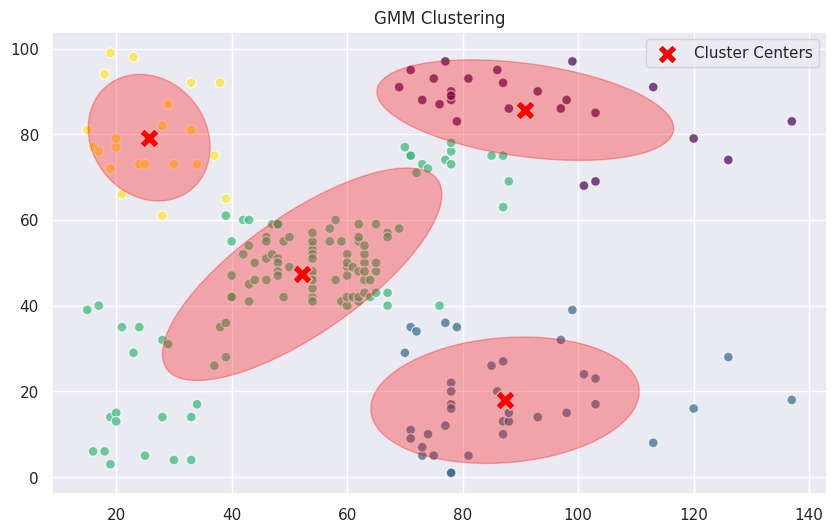

In [30]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(X)

# Predict cluster labels
labels = gmm.predict(X)

# Visualize the data and GMM clusters
plt.figure(figsize=(10, 6))

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7, edgecolors='w')

# Plot GMM cluster centers
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=200, marker='X', edgecolors='w', label='Cluster Centers')

# Plot ellipses representing GMM components
for i in range(len(gmm.means_)):
    covariance_matrix = gmm.covariances_[i][:2, :2]
    mean = gmm.means_[i, :2]
    v, w = np.linalg.eigh(covariance_matrix)
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180.0 * angle / np.pi
    ell = plt.matplotlib.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color='red', alpha=0.3)
    plt.gca().add_patch(ell)

plt.title('GMM Clustering')
plt.legend()
plt.show()

Clustering by Age and Spending Score

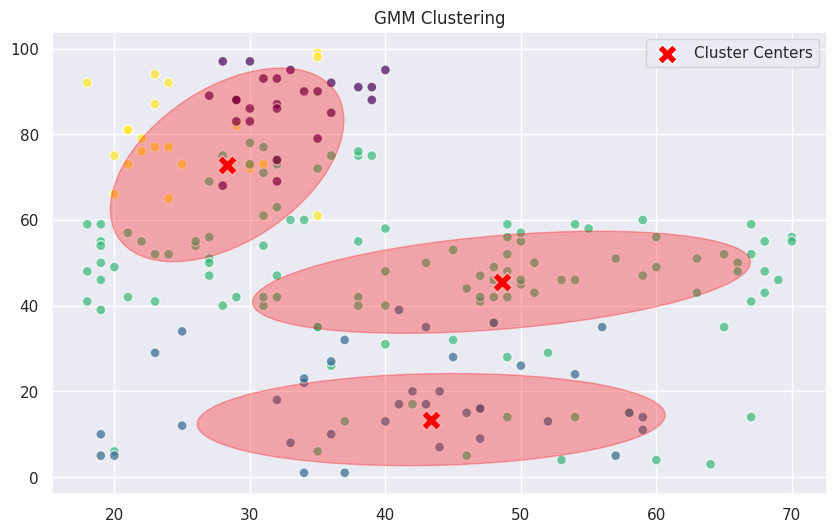

In [31]:
gmm3 = GaussianMixture(n_components=3, random_state=42)
gmm3.fit(X1)

# Predict cluster labels
labels3 = gmm3.predict(X1)

# Visualize the data and GMM clusters
plt.figure(figsize=(10, 6))

# Plot the data points
plt.scatter(X1[:, 0], X1[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7, edgecolors='w')

# Plot GMM cluster centers
plt.scatter(gmm3.means_[:, 0], gmm3.means_[:, 1], c='red', s=200, marker='X', edgecolors='w', label='Cluster Centers')

# Plot ellipses representing GMM components
for i in range(len(gmm3.means_)):
    covariance_matrix = gmm3.covariances_[i][:2, :2]
    mean = gmm3.means_[i, :2]
    v, w = np.linalg.eigh(covariance_matrix)
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180.0 * angle / np.pi
    ell = plt.matplotlib.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color='red', alpha=0.3)
    plt.gca().add_patch(ell)

plt.title('GMM Clustering')
plt.legend()
plt.show()

# Spectral Clustering

Spectral clustering is a technique in machine learning and data analysis that leverages the eigenvalues and eigenvectors of a similarity matrix derived from the data to perform clustering. Unlike traditional clustering methods such as K-means, spectral clustering is particularly effective when dealing with complex geometric structures or when the data is not well-separated in the input space.

Here's a high-level overview of the spectral clustering process:

1. Affinity Matrix Construction:

* Given a dataset with n data points, construct an affinity matrix (also known as a similarity matrix) that captures pairwise similarities between data points. Common choices for affinity measures include Gaussian radial basis function (RBF) kernel, k-nearest neighbors, or other similarity functions.

2. Graph Representation:

* Treat the affinity matrix as the adjacency matrix of a weighted graph, where each data point corresponds to a node in the graph, and the edges' weights represent the pairwise similarities.

3. Graph Laplacian Matrix:

* Compute the graph Laplacian matrix, which is derived from the graph's adjacency matrix. There are different forms of the Laplacian, such as the unnormalized Laplacian, normalized Laplacian, and others.

4. Eigenvalue Decomposition:

* Perform eigenvalue decomposition on the graph Laplacian matrix to obtain its eigenvalues and corresponding eigenvectors.

5. Embedding:

* Use the eigenvectors corresponding to the smallest eigenvalues to embed the data into a lower-dimensional space. This embedding often enhances the separation of clusters.

6. K-means or Other Clustering Algorithm:

* Apply a traditional clustering algorithm (e.g., K-means) in the lower-dimensional space to assign data points to clusters.
Spectral clustering is advantageous for discovering clusters in data with non-linear or intricate structures. It can handle clusters of different shapes and sizes and is less sensitive to the initial configuration of centroids compared to K-means. Additionally, spectral clustering does not assume spherical or isotropic clusters, making it suitable for a wide range of data distributions.

Clustering with the annual income & spending score columns

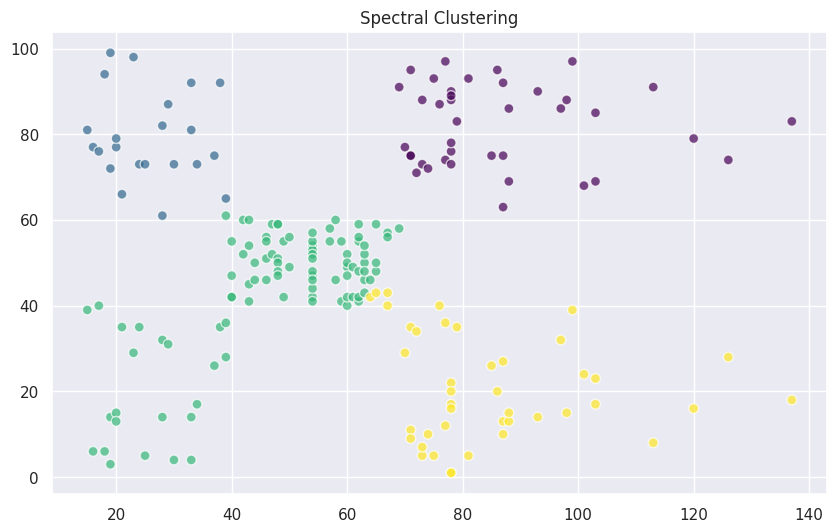

In [32]:
spectral_clustering = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=2)
labels = spectral_clustering.fit_predict(X)

# Visualize the data and spectral clusters
plt.figure(figsize=(10, 6))

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7, edgecolors='w')

plt.title('Spectral Clustering')
plt.show()

Clustering by Age and Spending Score

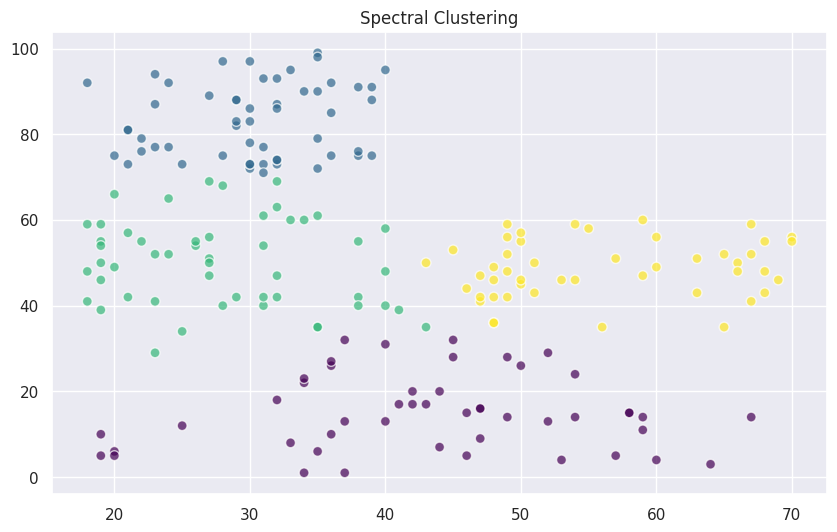

In [33]:
spectral_clustering = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=2)
labels = spectral_clustering.fit_predict(X1)

# Visualize the data and spectral clusters
plt.figure(figsize=(10, 6))

# Plot the data points
plt.scatter(X1[:, 0], X1[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7, edgecolors='w')

plt.title('Spectral Clustering')
plt.show()

# Agglomerative Hierarchical Clustering

Hierarchical clustering is a method used in cluster analysis to build a hierarchy of clusters. It creates a tree-like structure (dendrogram) that represents the relationships between data points. There are two main types of hierarchical clustering:

1. Agglomerative Hierarchical Clustering:

* Start: Each data point is treated as a single cluster.
* Merge: The two closest clusters are merged into a single cluster.
* Repeat: Steps 2 and 3 are repeated until only one cluster remains, forming a hierarchical structure.

2. Divisive Hierarchical Clustering:

* Start: All data points are considered to be a single cluster.
* Divide: The cluster is divided into two subclusters.
* Repeat: Steps 2 and 3 are applied recursively to each subcluster until each data point is in its own cluster.

Common distance measures used in hierarchical clustering include Euclidean distance, Manhattan distance, and others. The choice of distance metric depends on the nature of the data.

Clustering with the annual income & spending score columns

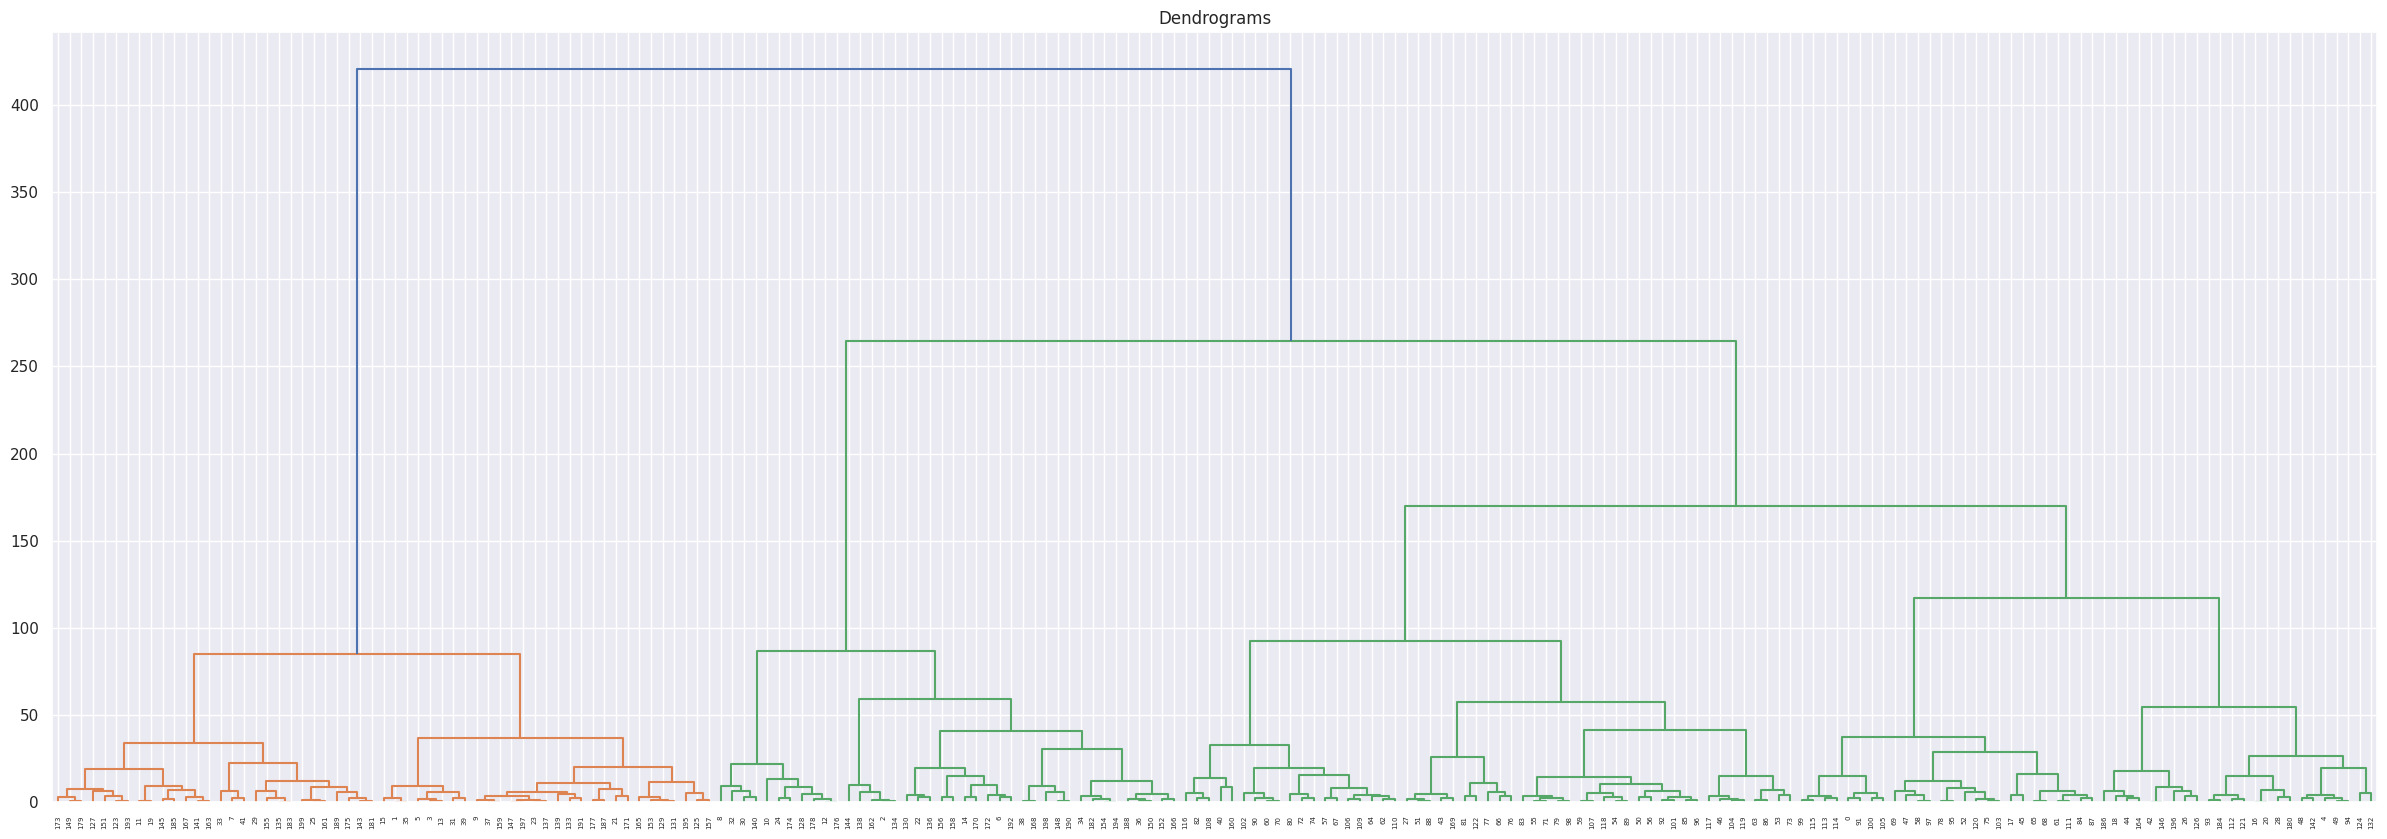

In [34]:
plt.figure(figsize=(30, 10))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X1, method='ward'))

Clustering by Age and Spending Score

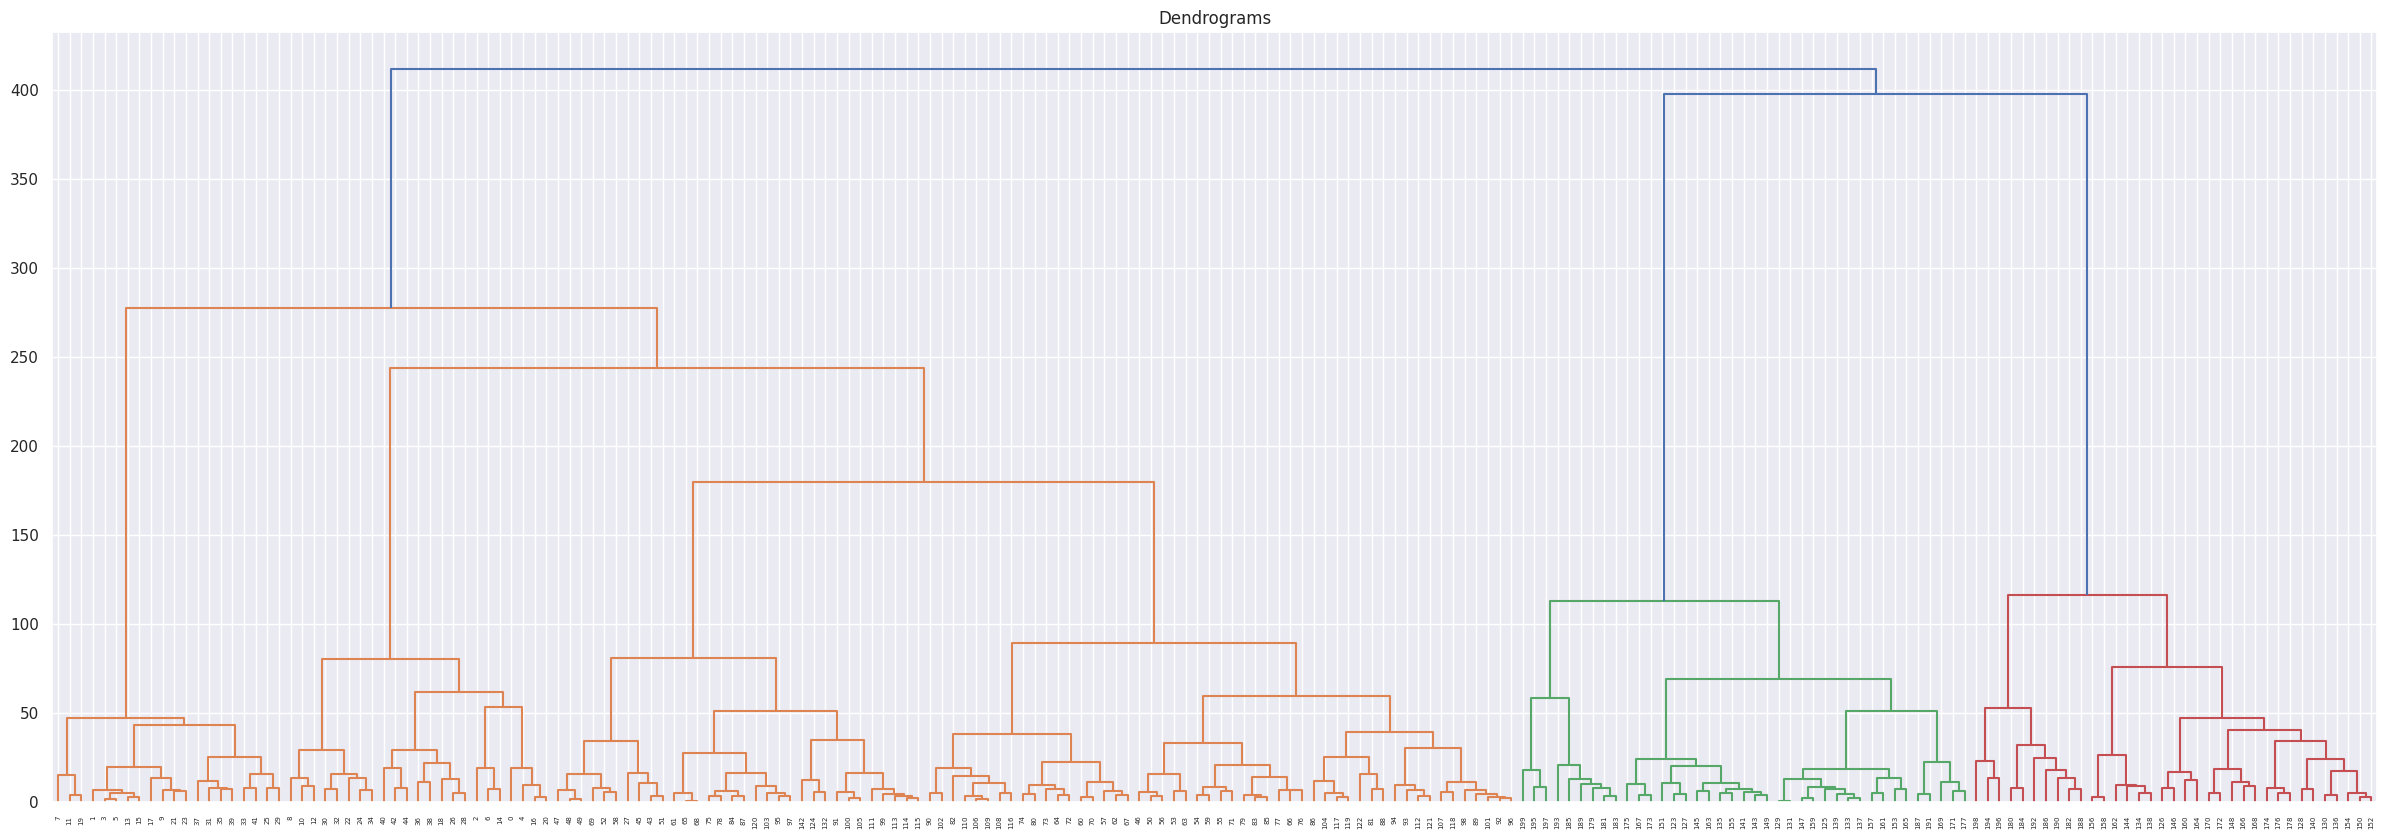

In [35]:
plt.figure(figsize=(30, 10))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X3, method='ward'))